In [1]:
#Импорт библиотек
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow import keras

2023-04-23 21:46:27.188654: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Загрузка датасетов
dataset_1 = pd.read_excel("X_bp.xlsx", index_col=0)
dataset_2 = pd.read_excel("X_nup.xlsx", index_col=0)

# Объединение датасетов по индексу с типом объединения INNER
merged_dataset = dataset_1.join(dataset_2, how="inner")

merged_dataset.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
№ образца                                                      
0                                 1.857143            2030.0   
1                                 1.857143            2030.0   
2                                 1.857143            2030.0   
3                                 1.857143            2030.0   
4                                 2.771331            2030.0   

           модуль упругости, ГПа  Количество отвердителя, м.%  \
№ образца                                                       
0                     738.736842                        30.00   
1                     738.736842                        50.00   
2                     738.736842                        49.90   
3                     738.736842                       129.00   
4                     753.000000                       111.86   

           Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
№ образца                                                              
0                                22.267857                100.000000   
1                                23.750000                284.615385   
2                                33.000000                284.615385   
3                                21.250000                300.000000   
4                                22.267857                284.615385   

           Поверхностная плотность, г/м2  \
№ образца                                  
0                                  210.0   
1                                  210.0   
2                                  210.0   
3                                  210.0   
4                                  210.0   

           Модуль упругости при растяжении, ГПа  \
№ образца                                         
0                                          70.0   
1                                          70.0   
2                                          70.0   
3                                          70.0   
4                                          70.0   

           Прочность при растяжении, МПа  Потребление смолы, г/м2  \
№ образца                                                           
0                                 3000.0                    220.0   
1                                 3000.0                    220.0   
2                                 3000.0                    220.0   
3                                 3000.0                    220.0   
4                                 3000.0                    220.0   

           Угол нашивки, град  Шаг нашивки  Плотность нашивки  
№ образца                                                      
0                           0          4.0               57.0  
1                           0          4.0               60.0  
2                           0          4.0               70.0  
3                           0          5.0               47.0  
4                           0          5.0               57.0

In [3]:
merged_dataset.tail()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
№ образца                                                      
1018                              2.271346       1952.087902   
1019                              3.444022       2050.089171   
1020                              3.280604       1972.372865   
1021                              3.705351       2066.799773   
1022                              3.808020       1890.413468   

           модуль упругости, ГПа  Количество отвердителя, м.%  \
№ образца                                                       
1018                  912.855545                    86.992183   
1019                  444.732634                   145.981978   
1020                  416.836524                   110.533477   
1021                  741.475517                   141.397963   
1022                  417.316232                   129.183416   

           Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
№ образца                                                              
1018                             20.123249                324.774576   
1019                             19.599769                254.215401   
1020                             23.957502                248.423047   
1021                             19.246945                275.779840   
1022                             27.474763                300.952708   

           Поверхностная плотность, г/м2  \
№ образца                                  
1018                          209.198700   
1019                          350.660830   
1020                          740.142791   
1021                          641.468152   
1022                          758.747882   

           Модуль упругости при растяжении, ГПа  \
№ образца                                         
1018                                  73.090961   
1019                                  72.920827   
1020                                  74.734344   
1021                                  74.042708   
1022                                  74.309704   

           Прочность при растяжении, МПа  Потребление смолы, г/м2  \
№ образца                                                           
1018                         2387.292495               125.007669   
1019                         2360.392784               117.730099   
1020                         2662.906040               236.606764   
1021                         2071.715856               197.126067   
1022                         2856.328932               194.754342   

           Угол нашивки, град  Шаг нашивки  Плотность нашивки  
№ образца                                                      
1018                       90     9.076380          47.019770  
1019                       90    10.565614          53.750790  
1020                       90     4.161154          67.629684  
1021                       90     6.313201          58.261074  
1022                       90     6.078902          77.434468

In [4]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [5]:
# Предобработка данных

# Удаление дубликатов
normalized_dataset = merged_dataset.drop_duplicates()

# Обработка пропущенных значений
normalized_dataset = normalized_dataset.dropna()


In [6]:
normalized_dataset.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1023.000000              1023.000000   
mean                     2466.922843               218.423144   
std                       485.628006                59.735931   
min                      1036.856605                33.803026   
25%                      2135.850448               179.627520   
50%                      2459.524526               219.198882   
75%                      2767.193119               257.481724   
max                      3848.436732               414.590628   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count         1023.000000  1023.000000        1023.000000  
mean            44.252199     6.899222          57.153929  
std             45.015793     2.563467          12.350969  
min              0.000000     0.000000           0.000000  
25%              0.000000     5.080033          49.799212  
50%              0.000000     6.916144          57.341920  
75%             90.000000     8.586293          64.944961  
max             90.000000    14.440522         103.988901

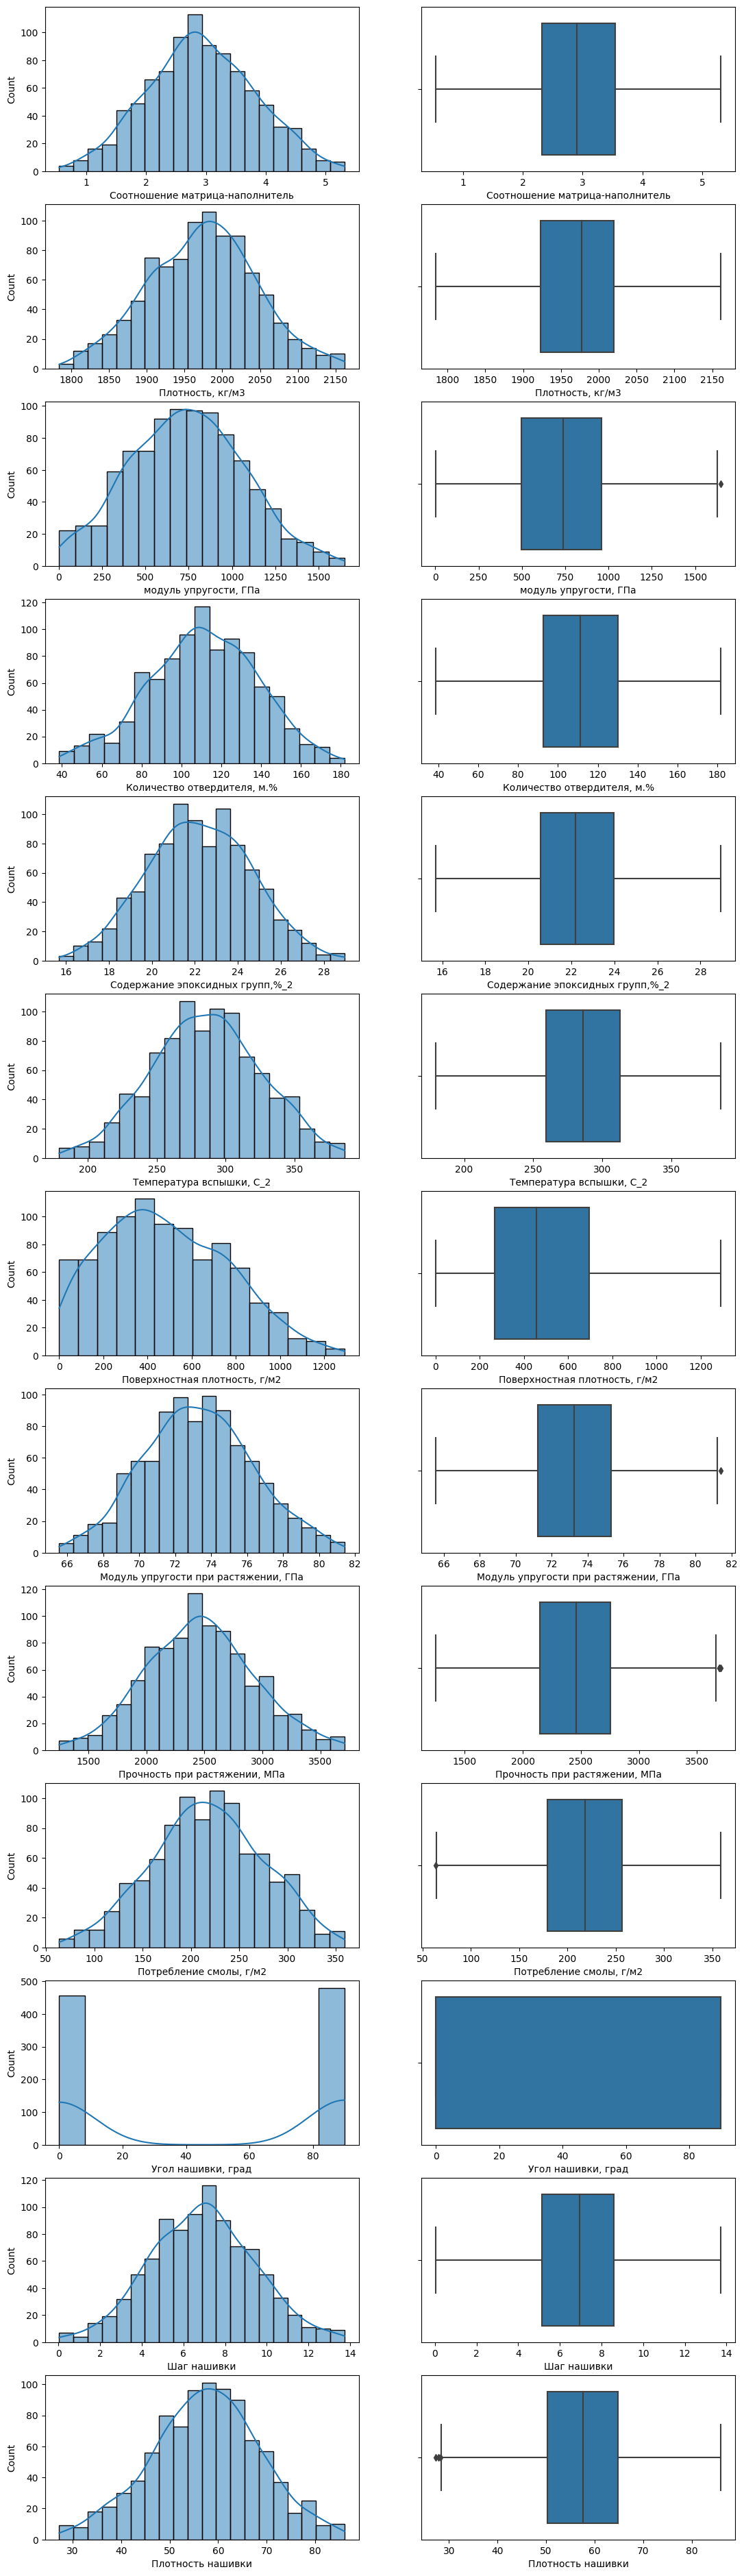

In [32]:
# Графики распределения переменных и "ящики с усами"

fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for k, column in enumerate(normalized_dataset.columns):    
    sns.histplot(data=normalized_dataset, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=normalized_dataset, x=column, ax=axes[k, 1])
plt.show()

In [33]:
# Удаление выбросов (шумов) с использованием межквартильного размаха (IQR)
Q1 = normalized_dataset.quantile(0.25)
Q3 = normalized_dataset.quantile(0.75)
IQR = Q3 - Q1
normalized_dataset = normalized_dataset[~((normalized_dataset < (Q1 - 1.5 * IQR)) | (normalized_dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

normalized_dataset.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [34]:
# Разделение данных и обучение модели RandomForestRegressor

# Разделение датасета на X (признаки) и y (целевые значения)
X = normalized_dataset.drop(columns=['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'])
y = normalized_dataset[['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']]

# Разделение данных на обучающую и тестовую выборки (70% обучение, 30% тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание модели RandomForestRegressor
model = RandomForestRegressor()

# Определение сетки гиперпараметров для поиска
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Поиск оптимальных гиперпараметров с использованием GridSearchCV и кросс-валидации (10 блоков)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Обучение модели с оптимальными гиперпараметрами
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=200)

In [35]:
# Предсказание значений и оценка качества модели RandomForestRegressor

# Предсказание значений на тестовой выборке
y_pred = best_model.predict(X_test)

# Оценка качества модели (MSE и R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 104390.31668671279
R^2 Score: 0.0019529463951273307


In [36]:
#Разделение данных и создание нейронной сети

# Разделение датасета на X (признаки) и y (целевые значения - соотношение матрица-наполнитель)
X = normalized_dataset.drop(columns=['Соотношение матрица-наполнитель'])
y = normalized_dataset['Соотношение матрица-наполнитель']

# Разделение данных на обучающую и тестовую выборки (70% обучение, 30% тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание нейронной сети
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])


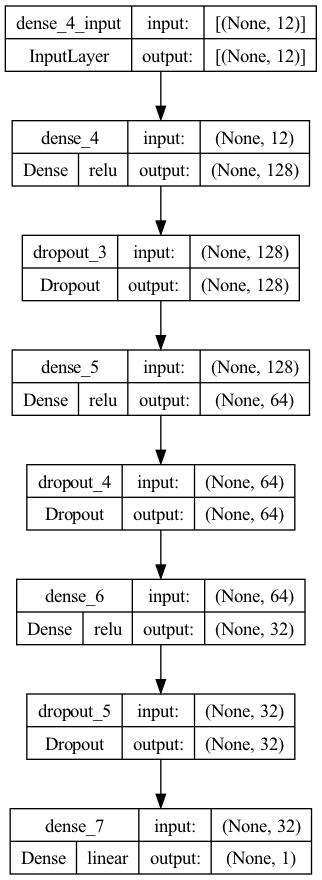

In [37]:
# Архитектура нейросети 
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [45]:
# Компиляция нейронной сети
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Обучение нейронной сети
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
17/17 [==============================] - 1s 8ms/step - loss: 32.3397 - mae: 2.9049 - val_loss: 6.7478 - val_mae: 2.4059
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 7.6913 - mae: 2.1867 - val_loss: 2.8404 - val_mae: 1.4526
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 6.3905 - mae: 1.9338 - val_loss: 2.3098 - val_mae: 1.2861
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 7.4206 - mae: 1.8254 - val_loss: 2.3491 - val_mae: 1.2970
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 7.3174 - mae: 1.6786 - val_loss: 2.2276 - val_mae: 1.2520
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 7.2523 - mae: 1.6475 - val_loss: 1.4520 - val_mae: 0.9689
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 4.4991 - mae: 1.4476 - val_loss: 2.0651 - val_mae: 1.1894
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 5.8490 - 

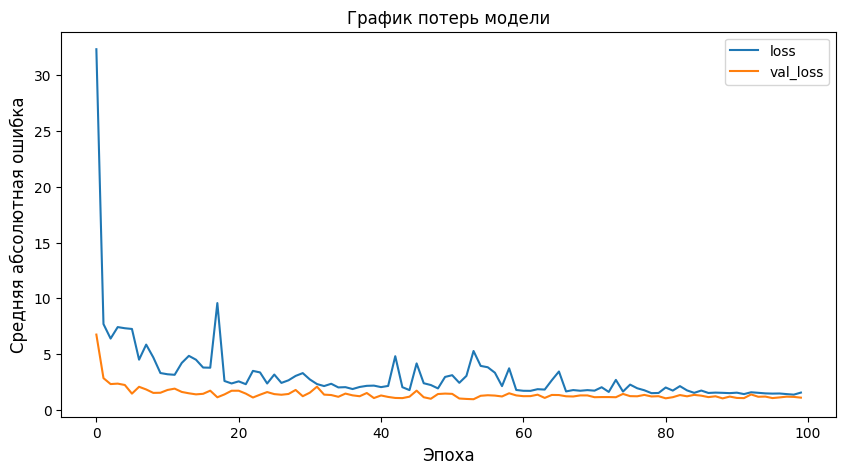

In [46]:
# График потерь модели

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График потерь модели', size=12)
plt.ylabel('Средняя абсолютная ошибка', size=12)
plt.xlabel('Эпоха', size=12)
plt.legend(['loss', 'val_loss'], loc='best')
plt.show()

In [47]:
# Предсказание значений на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества модели (MSE и R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



9/9 [==============================] - 0s 938us/step


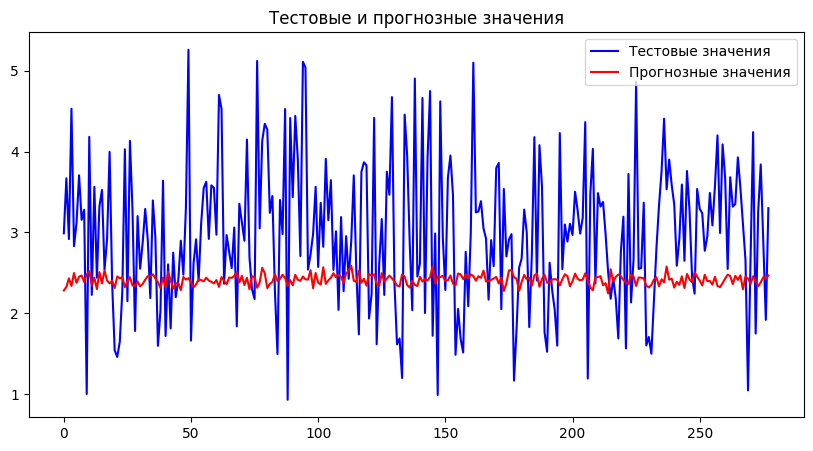

In [48]:
plt.figure(figsize=(10,5))
plt.title('Тестовые и прогнозные значения', size=12)
plt.plot(y_test.values, color='blue', label = 'Тестовые значения')
plt.plot(y_pred, color='red', label = 'Прогнозные значения')
plt.legend(loc='best')
plt.show()

In [49]:
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 1.1179807836379718
R^2 Score: -0.4215145375155245
